# Connect Google Drive

In [ ]:
# prompt: write a code to read from google drive
from google.colab import drive
drive.mount('/content/drive/')
root_path = 'drive/MyDrive/raspcar/hanuman/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Display Image

img_1_F.jpg


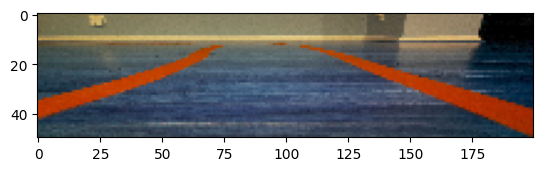

In [ ]:
# prompt: plot images using matplot lib readu from drive
import matplotlib.pyplot as plt
import os
import cv2
# Get the list of files in the directory
image_files = os.listdir(root_path)
# Iterate over the files and plot them
for image_file in image_files:
  # Read the image file
  print(image_file)
  image = cv2.imread(os.path.join(root_path, image_file))
  image = cv2.resize(image, (200, 50))
  # Plot the image
  plt.imshow(image)
  plt.show()
  break

# Prepare data for model training

In [ ]:
import numpy as np
import os
import cv2
def build_data():
  image_files = os.listdir(root_path)
  x_train = []
  y_train = []
  # Iterate over the files and plot them
  for image_file in image_files:
    # Read the image file
    image = cv2.imread(os.path.join(root_path, image_file))
    resized_image = cv2.resize(image, (200, 50))
    # Plot the image
    y = []
    if  "L" in image_file :
      y = [1,0,0]
    elif "R" in image_file:
      y = [0,0,1]
    elif "F" in image_file:
      y = [0,1,0]
    x_train.append(resized_image/255)
    y_train.append(y)

  return np.array(x_train), np.array(y_train)


In [ ]:
x_data, y_label = build_data()

In [ ]:
y_L_index = [index for  index, y in enumerate(y_label) if y[0]==1 ]
y_R_index = [index for  index, y in enumerate(y_label) if y[2]==1 ]
y_F_index = [index for  index, y in enumerate(y_label) if y[1]==1 ]

78


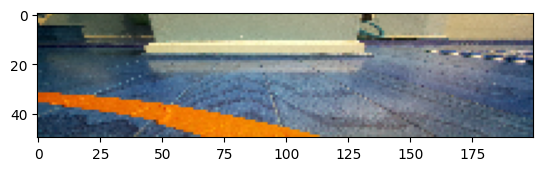

In [ ]:
import random
direction  =  y_L_index
index = direction[random.randint(0,len(direction)-1)]
print(index)
plt.imshow(x_data[index])

251


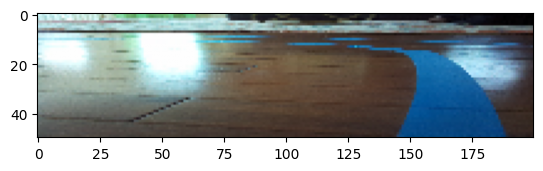

In [ ]:
import random
direction  =  y_R_index
index = direction[random.randint(0,len(direction)-1)]
print(index)
plt.imshow(x_data[index])

388


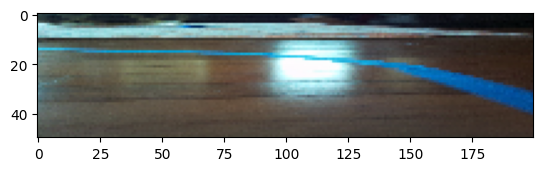

In [ ]:
import random
direction  =  y_F_index
index = direction[random.randint(0,len(direction)-1)]
print(index)
plt.imshow(x_data[index])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_data, y_label, test_size=0.2, random_state=42)

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)

In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(50,200,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=250,activation="relu"))
model.add(Dense(units=100,activation="relu"))
model.add(Dense(units=3, activation="softmax"))

In [ ]:
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 50, 200, 16)       448       
                                                                 
 conv2d_11 (Conv2D)          (None, 50, 200, 8)        1160      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 25, 100, 8)        0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 20000)             0         
                                                                 
 dense_15 (Dense)            (None, 250)               5000250   
                                                                 
 dense_16 (Dense)            (None, 100)               25100     
                                                      

In [ ]:
hist = model.fit(X_train, y_train, batch_size =16, epochs= 10, validation_data=(X_test, y_test))

Epoch 1/10
20/20 [==============================] - 3s 89ms/step - loss: 0.6661 - accuracy: 0.7358 - val_loss: 0.3303 - val_accuracy: 0.8750
Epoch 2/10
20/20 [==============================] - 2s 78ms/step - loss: 0.1990 - accuracy: 0.9340 - val_loss: 0.2535 - val_accuracy: 0.9125
Epoch 3/10
20/20 [==============================] - 2s 79ms/step - loss: 0.0774 - accuracy: 0.9811 - val_loss: 0.3529 - val_accuracy: 0.9375
Epoch 4/10
20/20 [==============================] - 2s 79ms/step - loss: 0.0346 - accuracy: 0.9843 - val_loss: 0.3819 - val_accuracy: 0.9250
Epoch 5/10
20/20 [==============================] - 2s 76ms/step - loss: 0.0118 - accuracy: 1.0000 - val_loss: 0.6131 - val_accuracy: 0.9125
Epoch 6/10
20/20 [==============================] - 2s 79ms/step - loss: 0.0792 - accuracy: 0.9780 - val_loss: 0.3218 - val_accuracy: 0.9375
Epoch 7/10
20/20 [==============================] - 2s 83ms/step - loss: 0.0239 - accuracy: 0.9937 - val_loss: 0.4924 - val_accuracy: 0.9250
Epoch 8/10
20

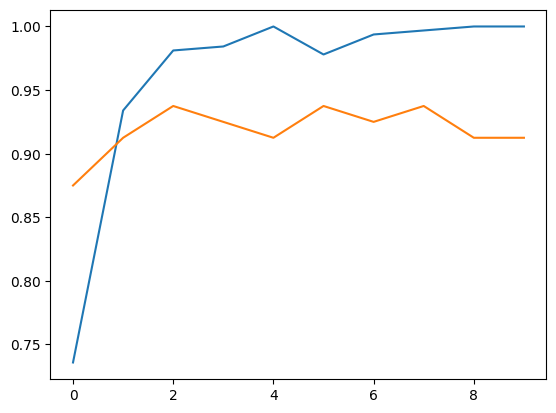

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

In [ ]:
model.save("hanuman1.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Create a new instance of model , load weights and test it

In [ ]:
model1 = Sequential()
model1.add(Conv2D(input_shape=(50,200,3),filters=32,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(Conv2D(filters=16,kernel_size=(3,3),padding="same", activation="relu"))
model1.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model1.add(Flatten())
model1.add(Dense(units=250,activation="relu"))
model1.add(Dense(units=100,activation="relu"))
model1.add(Dense(units=3, activation="softmax"))

In [ ]:
model1.load_weights("hanuman1.h5")